# 3. Customer Address

# - All the code and in depth analysis is below the description!

# Customer Addresss: Data Quality Issues and resolving methods used

- **Customer ID:** This column includes the ID of each customer. There was a problem in this column, **Inconsistency** was experienced across different datasets. This Dataset and Customer Demographic Dataset. To keep the values of the customer ID consistent we removed customers with Customer ID above 4000.

- **Address:** This column includes the addresses of each customers. There was no issue in this column.

- **Postcode:** This column includes the post code for each customers. There was no issue in this column.

- **State:** This column includes the states where each customers are in. **Inconsistency** was experienced in this column to describe similar states. "New South Wales" and "NSW", "VIC" and "Victoria". We resolved this issue by formatting "New South Wales" to NSW and "Victoria" to VIC.

- **Country:** This column includes the country of each customers. This column is **Irrelevant** becacuse all the customers are from one country and It won't add any value. So we filtered this column out.

- **Property Valuation:** This column includes about an estimate of the worth of a property of the customer at the time of the valuation. As far as domain knowledge there is no problem in this field

In [1]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path where the file is
file = r"Dataset/KPMG_VI_New_raw_data_update_final.xlsx"

cust_add = pd.read_excel(file, sheet_name="CustomerAddress") # Custmer Address Dataset

In [3]:
# Top 5 rows..
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [4]:
# Bottom 5 rows
cust_add.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [5]:
cust_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


- **_Looks good there are no empty values all the column_**

In [6]:
# The data frame below doesn't make sense but it will help us see if there are invalid values in the columns. 
# Luckily we don't have any of those.
cust_add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [7]:
# To see the shape of our dataset
cust_add.shape

(3999, 6)

### I. Customer ID

In [8]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
cust_add["customer_id"].duplicated().sum()

0

- ___No duplicated Customer IDs___

In [10]:
cust_add["customer_id"].min()

1

In [11]:
cust_add["customer_id"].max()

4003

- ___There are customer ID with value above 4000, which wasn't the case in the previous dataset. So we will drop records with Customer ID above 4000.___

In [12]:
cust_add.loc[cust_add["customer_id"] > 4_000]

,customer_id,address,postcode,state,country,property_valuation
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [13]:
cust_id_above_4000 = cust_add.loc[cust_add["customer_id"] > 4_000].index

cust_add.drop(cust_id_above_4000, inplace=True)

In [14]:
cust_add["customer_id"].max()

4000

- ___Now we have fixed the `Inconsistency` issue in the Customer ID.___

### II. Address

In [15]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
cust_add["address"]

0              060 Morning Avenue
1             6 Meadow Vale Court
2              0 Holy Cross Court
3             17979 Del Mar Point
4                9 Oakridge Court
                  ...            
3991           0 Transport Center
3992          4 Dovetail Crossing
3993         736 Roxbury Junction
3994              1482 Hauk Trail
3995    57042 Village Green Point
Name: address, Length: 3996, dtype: object

- __This column includes the addresses of each individual customers.__

In [17]:
cust_add.loc[cust_add.duplicated(subset=["address"], keep=False)]

,customer_id,address,postcode,state,country,property_valuation
732,737,3 Talisman Place,4811,QLD,Australia,2
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


- __As you can see there are some addresses duplicated, You might say that each customer should have a unique address so this is a problem, but if you look closely you can see that those address with similar address have a different postcode and customer id so this is not a problem.__

- __`You can also say that a customer should have a unique address but you can't only look at the address, you should also consider their Postcode and state. when you do that you'll see that there are no duplicated addresses.`__

In [18]:
cust_add.duplicated(subset=["address", "postcode", "state"]).sum()

0

### III. Postcode

In [19]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [20]:
cust_add["postcode"]

0       2016
1       2153
2       4211
3       2448
4       3216
        ... 
3991    3977
3992    2350
3993    2540
3994    3064
3995    4511
Name: postcode, Length: 3996, dtype: int64

- ___Different customers can have similar postcodes and as you can see below there are 873 unique postcodes.___

In [21]:
len(cust_add["postcode"].unique())

873

### IV. State

In [22]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [23]:
cust_add["state"]

0       New South Wales
1       New South Wales
2                   QLD
3       New South Wales
4                   VIC
             ...       
3991                VIC
3992                NSW
3993                NSW
3994                VIC
3995                QLD
Name: state, Length: 3996, dtype: object

- ___The State column tells us what state the customer lives in.___

In [24]:
cust_add["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

- __`Looks like there is a problem in the State column. There is an Inconsistency issue in this column. Let's resolve it.`__

In [25]:
# Keeping the stability for New South Wales.
nsw_indexer = cust_add.loc[cust_add["state"] == "New South Wales"].index
cust_add.loc[nsw_indexer, "state"] = "NSW"

In [26]:
# Keeping the stability for Victoria.
vic_indexer = cust_add.loc[cust_add["state"] == "Victoria"].index
cust_add.loc[vic_indexer, "state"] = "VIC"

In [27]:
# Checking...
cust_add["state"].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

- ___**We have now resolved the issue regarding the inconsistency of State column.**___

- _`Let's visualize it.`_

In [ ]:
cust_add["state"].value_counts(normalize=True)

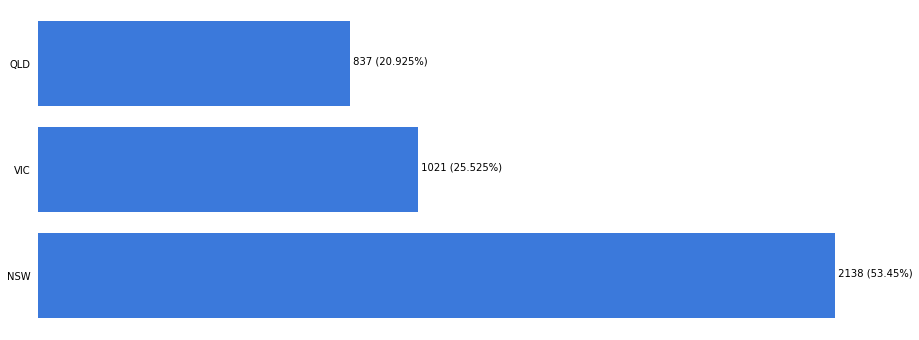

In [28]:
plt.rcParams["figure.figsize"] = 15, 6

fig, ax = plt.subplots()

ax.barh(cust_add["state"].value_counts().index, cust_add["state"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_add["state"].value_counts().values):
    ax.text(value, index, s=f" {value} ({value/40}%)")
    

plt.show()

- __Most of our customers are from New South Wales, 53.5% of the customers followed by Victoria, 25.5% and finally Queensland, 21%.__

### V. Country

In [29]:
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [30]:
cust_add["country"]

0       Australia
1       Australia
2       Australia
3       Australia
4       Australia
          ...    
3991    Australia
3992    Australia
3993    Australia
3994    Australia
3995    Australia
Name: country, Length: 3996, dtype: object

- __The `Country` coulumn tells us about the country of a given customer.__

In [31]:
cust_add["country"].unique()

array(['Australia'], dtype=object)

- **`As we can see there is only one country in the Country column, Australia. All of our customers are from Australia so this column has no additional information. It is Irrelevant. So we will remove the column.`**

In [32]:
cust_add.drop("country", axis=1, inplace=True)

### VI. Property Valuation

In [33]:
cust_add.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


In [34]:
cust_add["property_valuation"]

0       10
1       10
2        9
3        4
4        9
        ..
3991     6
3992     2
3993     6
3994     3
3995     6
Name: property_valuation, Length: 3996, dtype: int64

- ___Property Valuation is an estimate of the worth of a property at the time of the valuation.___

# Full Description about the Customer Address Data Quality Issues and resolving methods used

- **Customer ID:** This column includes the ID of each customer. There was a problem in this column, **Inconsistency** was experienced across different datasets. This Dataset and Customer Demographic Dataset. To keep the values of the customer ID consistent we removed customers with Customer ID above 4000.

- **Address:** This column includes the addresses of each customers. There was no issue in this column.

- **Postcode:** This column includes the post code for each customers. There was no issue in this column.

- **State:** This column includes the states where each customers are in. **Inconsistency** was experienced in this column to describe similar states. "New South Wales" and "NSW", "VIC" and "Victoria". We resolved this issue by formatting "New South Wales" to NSW and "Victoria" to VIC.

- **Country:** This column includes the country of each customers. This column is **Irrelevant** becacuse all the customers are from one country and It won't add any value. So we filtered this column out.

- **Property Valuation:** This column includes about an estimate of the worth of a property of the customer at the time of the valuation. As far as domain knowledge there is no problem in this field

In [35]:
cust_add

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9
...,...,...,...,...,...
3991,3996,0 Transport Center,3977,VIC,6
3992,3997,4 Dovetail Crossing,2350,NSW,2
3993,3998,736 Roxbury Junction,2540,NSW,6
3994,3999,1482 Hauk Trail,3064,VIC,3


In [36]:
cust_add.to_csv(r"Exported/customer_address.csv", index=False)